In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

# Agglomerative Clustering

In [2]:
Crime = pd.read_csv("crime_data.csv")
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
Crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


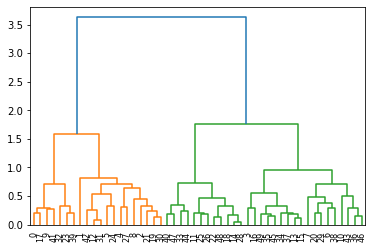

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [9]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head(10)

,Clusters
0,3
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [10]:
Crime['Total_Crime'] = Crime["Murder"] + Crime["Assault"] + Crime["UrbanPop"] + Crime["Rape"]

In [11]:
Crime['h_clusterid'] = hc.labels_

In [12]:
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Total_Crime,h_clusterid
0,Alabama,13.2,236,58,21.2,328.4,3
1,Alaska,10.0,263,48,44.5,365.5,1
2,Arizona,8.1,294,80,31.0,413.1,1
3,Arkansas,8.8,190,50,19.5,268.3,0
4,California,9.0,276,91,40.6,416.6,1
5,Colorado,7.9,204,78,38.7,328.6,1
6,Connecticut,3.3,110,77,11.1,201.4,0
7,Delaware,5.9,238,72,15.8,331.7,0
8,Florida,15.4,335,80,31.9,462.3,1
9,Georgia,17.4,211,60,25.8,314.2,3


In [13]:
Crime.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape,Total_Crime
,,mean,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333,236.127778
1,1,10.815385,257.384615,76.000000,33.192308,377.392308
2,2,3.091667,76.000000,52.083333,11.833333,143.008333
3,3,14.671429,251.285714,54.285714,21.685714,341.928571


# K-Means Clustering

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [16]:
Crime2 = pd.read_csv("crime_data.csv")
Crime2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime2 = scaler.fit_transform(Crime2.iloc[:,1:])

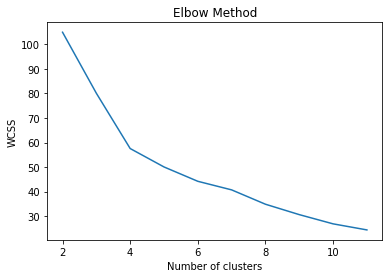

In [19]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_crime2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_crime2)

KMeans(n_clusters=5, random_state=42)

In [21]:
clusters_new.labels_

array([3, 0, 0, 4, 0, 0, 2, 4, 0, 3, 2, 1, 0, 4, 1, 4, 4, 3, 1, 0, 2, 0,
       1, 3, 0, 4, 4, 0, 1, 2, 0, 0, 3, 1, 2, 4, 4, 2, 2, 3, 1, 3, 0, 2,
       1, 4, 2, 1, 1, 4])

In [22]:
#Assign clusters to the data set
Crime2['clusterid_new'] = clusters_new.labels_

In [23]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789]])

In [24]:
Crime2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308
1,1,2.680000,70.100000,51.000000,10.910000
2,2,4.955556,125.444444,80.111111,17.788889
3,3,14.671429,251.285714,54.285714,21.685714
4,4,6.790909,145.727273,61.636364,19.009091


# DB Scan Clustering

In [25]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [26]:
Crime3 = pd.read_csv("crime_data.csv")
Crime3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
print(Crime3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [29]:
Crime3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
array=Crime3.values

In [31]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [32]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [33]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [34]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

In [35]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [36]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [37]:
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [38]:
cl.value_counts()

cluster
 1         28
-1         10
 0          6
 3          3
 2          3
dtype: int64

In [40]:
pd.concat([Crime3,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [43]:
Crime3['clusterid'] = cl.cluster

In [44]:
Crime3.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.560,243.500000,70.800000,30.430000
1,0,14.950,237.000000,55.833333,22.616667
2,1,4.825,112.035714,63.357143,16.107143
3,2,11.400,234.666667,83.000000,25.200000
4,3,11.600,280.000000,70.333333,31.666667
